In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) #ignore the warning to keep ipython clean

import numpy as np # linear algebra
import pandas as pd # train processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

In [4]:
train = pd.read_csv("train/train.csv", parse_dates=['timestamp'])
test = pd.read_csv("train/test.csv", parse_dates=['timestamp'])

y = train["price_doc"]
ylog = np.log(y)

pred = pd.read_csv("naivexgb.csv")
ypred = pred["price_doc"]
ypred_log = np.log(ypred)

In [5]:
print ylog.describe(), ypred_log.describe()

count    30471.000000
mean        15.609483
std          0.604575
min         11.512925
25%         15.371548
50%         15.651990
75%         15.931766
max         18.526041
Name: price_doc, dtype: float64 count    7662.000000
mean       15.739644
std         0.404946
min        14.350297
25%        15.488691
50%        15.699180
75%        15.960903
max        18.002861
Name: price_doc, dtype: float64


(13.5, 17)

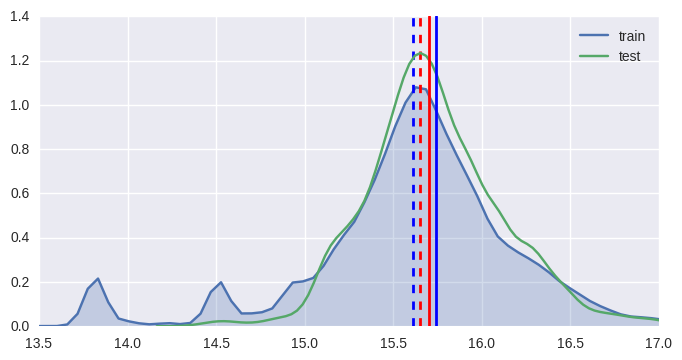

In [10]:
plt.figure(figsize=(8,4))
sns.kdeplot(ylog, shade=True, label="train")
plt.axvline(ylog.mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(ylog.median(), color='r', linestyle='dashed', linewidth=2)

sns.kdeplot(ypred_log, shade=False, label="test")
plt.axvline(ypred_log.mean(), color='b', linewidth=2)
plt.axvline(ypred_log.median(), color='r', linewidth=2)
plt.xlim([13.5,17])

In [24]:
train["year"] = train["timestamp"].dt.year
train["month"] = train["timestamp"].dt.month
train["time_month"] = (train['year'] - 2011) * 12 + train["month"]

test["year"] = test["timestamp"].dt.year
test["month"] = test["timestamp"].dt.month
test["time_month"] = (test['year'] - 2011) * 12 + test["month"]

In [25]:
train["time_month"].describe()

count    30471.000000
mean        36.181943
std         11.078452
min          8.000000
25%         28.000000
50%         38.000000
75%         45.000000
max         54.000000
Name: time_month, dtype: float64

In [26]:
test["time_month"].describe()

count    7662.000000
mean       60.328765
std         2.717016
min        55.000000
25%        58.000000
50%        61.000000
75%        63.000000
max        65.000000
Name: time_month, dtype: float64

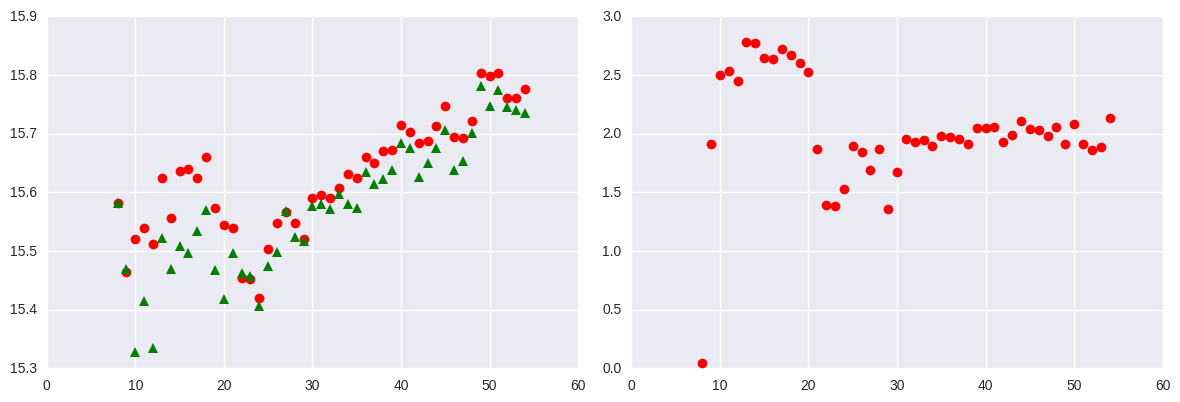

In [27]:
train['price'] = ylog
#train['time_month'] = train["time_month"].apply(str)
price_median = train.groupby('time_month')['price'].aggregate(np.median).reset_index()
price_mean = train.groupby('time_month')['price'].aggregate(np.mean).reset_index()
price_q1 = train.groupby('time_month')['price'].aggregate(lambda x: np.percentile(x,5)).reset_index()
price_q3 = train.groupby('time_month')['price'].aggregate(lambda x: np.percentile(x,95)).reset_index()

price_q1["delta"] = price_q3["price"] - price_q1["price"]


fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.1)

axs[0].plot(price_median["time_month"], price_median["price"], 'ro',
         price_mean["time_month"], price_mean["price"], 'g^')

axs[1].plot(price_q1["time_month"], price_q1["delta"], 'ro')

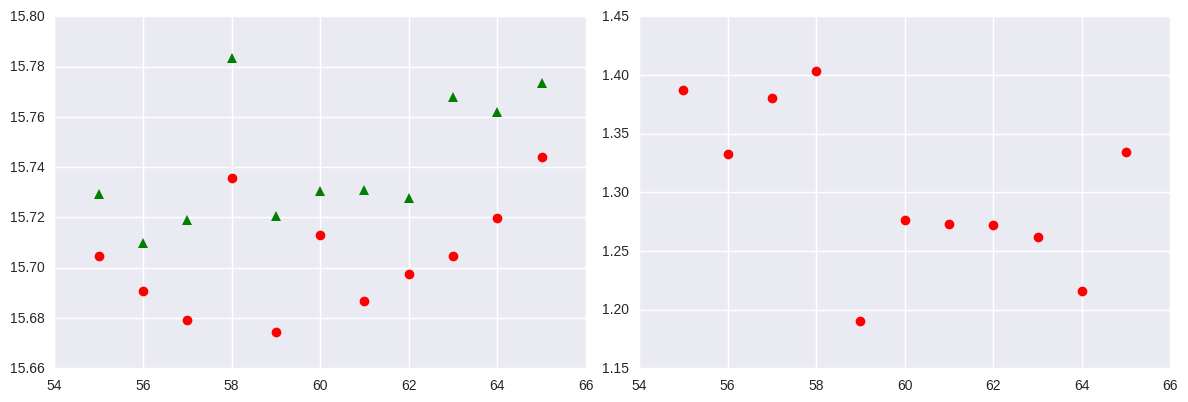

In [35]:
test['price'] = ypred_log
#test['time_month'] = train["time_month"].apply(str)
price_median = test.groupby('time_month')['price'].aggregate(np.median).reset_index()
price_mean = test.groupby('time_month')['price'].aggregate(np.mean).reset_index()
price_q1 = test.groupby('time_month')['price'].aggregate(lambda x: np.percentile(x,5)).reset_index()
price_q3 = test.groupby('time_month')['price'].aggregate(lambda x: np.percentile(x,95)).reset_index()

price_q1["delta"] = price_q3["price"] - price_q1["price"]


fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.1)

axs[0].plot(price_median["time_month"], price_median["price"], 'ro',
         price_mean["time_month"], price_mean["price"], 'g^')

axs[1].plot(price_q1["time_month"], price_q1["delta"], 'ro')

In [36]:
test.loc[test.time_month == 58, "price"] = test.loc[test.time_month == 58, "price"] * 0.995

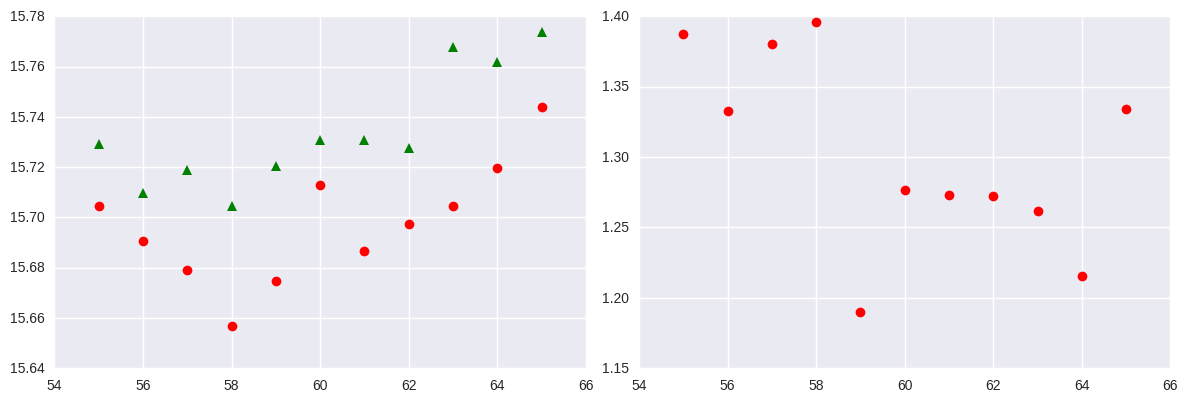

In [37]:
price_median = test.groupby('time_month')['price'].aggregate(np.median).reset_index()
price_mean = test.groupby('time_month')['price'].aggregate(np.mean).reset_index()
price_q1 = test.groupby('time_month')['price'].aggregate(lambda x: np.percentile(x,5)).reset_index()
price_q3 = test.groupby('time_month')['price'].aggregate(lambda x: np.percentile(x,95)).reset_index()

price_q1["delta"] = price_q3["price"] - price_q1["price"]


fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.1)

axs[0].plot(price_median["time_month"], price_median["price"], 'ro',
         price_mean["time_month"], price_mean["price"], 'g^')

axs[1].plot(price_q1["time_month"], price_q1["delta"], 'ro')